# Case Study: Cars4U  Project

### Background & Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 

## Objective

Explore and visualize the dataset.
Build a linear regression model to predict the prices of used cars.
Generate a set of insights and recommendations that will help the business.
Data Dictionary 


## Key Questions:

1. What are the key factors influencing the price of used cars?
2. Is there a good predictive model for the price of used cars? What does the performance assessment look like for such a model?

## Data Information

Each record in the database provides a description of an cars4u data set. Detailed attribute information can be found below.

**Attribute Information**:

1. S.No. : Serial Number
2. Name : Name of the car which includes Brand name and Model name
3. Location : The location in which the car is being sold or is available for purchase Cities
4. Year : Manufacturing year of the car
5. Kilometers_driven : The total kilometers driven in the car by the previous owner(s) in KM.
6. Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission : The type of transmission used by the car. (Automatic / Manual)
8. Owner : Type of ownership
9. Mileage : The standard mileage offered by the car company in kmpl or km/kg
10. Engine : The displacement volume of the engine in CC.
11. Power : The maximum power of the engine in bhp.
12. Seats : The number of seats in the car.
13. New_Price : The price of a new car of the same model in INR Lakhs.(1 Lakh = 100, 000)
14. Price : The price of the used car in INR Lakhs (1 Lakh = 100, 000)


## Let's start coding!

In [1]:
# please uncomment and run the next line if nb_black extension is not previously installed
# !pip install nb-black

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

### Loading necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

<IPython.core.display.Javascript object>

In [4]:
data = pd.read_csv("used_cars_data.csv")

# creating a copy of the data so that original data remains unchanged
df = data.copy()

<IPython.core.display.Javascript object>

**Let's view a sample of the dataset.**

In [5]:
np.random.seed(2)  # To get the same random results every time
df.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4584,4584,Tata Tigor 1.05 Revotorq XT,Kochi,2018,28973,Diesel,Manual,First,24.7 kmpl,1047 CC,69 bhp,5.0,NaN,6.64
6505,6505,Volkswagen Vento Diesel Highline,Chennai,2011,76041,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
3675,3675,Maruti Swift VDI,Ahmedabad,2012,65000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3.90
5654,5654,Hyundai i20 Magna Optional 1.2,Kochi,2014,42315,Petrol,Manual,First,18.5 kmpl,1197 CC,82.9 bhp,5.0,NaN,4.79
4297,4297,Toyota Camry 2.5 G,Mumbai,2014,68400,Petrol,Automatic,First,12.98 kmpl,2494 CC,178.4 bhp,5.0,NaN,13.50
2603,2603,Mercedes-Benz New C-Class 220 CDI AT,Jaipur,2010,74213,Diesel,Automatic,First,14.84 kmpl,2143 CC,170 bhp,5.0,NaN,11.50
4337,4337,Volkswagen Vento Petrol Highline AT,Kochi,2014,32283,Petrol,Automatic,Second,14.4 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.41
6625,6625,Maruti Swift VDI BSIV,Kolkata,2012,72000,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,NaN,NaN
2846,2846,Skoda Superb Elegance 1.8 TSI AT,Kochi,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,NaN,5.23
1237,1237,Audi Q3 2.0 TDI Quattro,Hyderabad,2013,60000,Diesel,Automatic,First,17.32 kmpl,1968 CC,184 bhp,5.0,NaN,21.00


<IPython.core.display.Javascript object>

* The *Mileage*, *Engine*, *New_Price*  and *Power* columns have values which contains String and integer together. we may need to remove string part.
* There are a lot of missing values.
* Price and New_Price columns values are in INR Lakhs (1 Lakh = 100, 000). we would convert it to Rupee.

**Let's check the shape of the data.**

In [6]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

**Let's check for duplicate values in the dataset.**

In [7]:
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Let's check the columns in the dataset.**

In [8]:
print(df.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

**Let's check the data types of the columns in the dataset.**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

* There are many numeric (*float* and *int* type) and string (*object* type) columns in the data.
* Dependent variable is the price of used cars, which is of *float* type.
* There are so many missing values in New_Price and Price column.

**Let's check for missing values in the data.**

In [10]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in many columns.

### Summary of the dataset

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* We can see that the **Price** of used cars vary between 0.44 and 160.0, which suggests that the price was sold on a scale of INR Lakhs (1 Lakh = 100, 000)
* **Mahindra XUV500 W8 2WD** car model is the most occurring model of car.
* **Mumbai** is the most common Location for sale of the used car.
* The most of the car fuel type which was sold in the market is **Diesel**
* The most of the car transmission type which was sold in the market is **Manual**
* The most of the car fuel comsuming which was sold in the market is **17.0 kmpl**
* The most of the car engine size which was sold in the market is **1197 CC**
* The most of the car engine power which was sold in the market is **74 bhp**

## Data Preprocessing

 **We will drop *New_Price* column because so many missing values**

In [12]:
df.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
df.shape

(7253, 13)

<IPython.core.display.Javascript object>

In [14]:
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [15]:
# checking missing values in rest of the data
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

**We will remove string part from mileage and change type to fload and fill missing values with mean**

In [16]:
# def fuel_convert_float(var):
#     if isinstance(var, str):  # checking if the value is string or not
#         if "kmpl" in var:  # checking for the presence of mileage

#             spl = var.split(" ")

#             pl = float(spl[0].strip())  # # taking numeric part

#             return pl

#         elif "km/kg" in var:

#             spl = var.split(" ")

#             kg = float(spl[0].strip())  # # taking numeric part

#             return kg
#         else:
#             return float(var)  # if no kmpl part driectly converting value to float
#     else:
#         return float(var)  # will return float if value is not string


df_mileage = df["Mileage"].str.split(" ", expand=True)
df_mileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


<IPython.core.display.Javascript object>

In [17]:
# let's verify that there are two units
df_mileage[1].value_counts()

kmpl     7177
km/kg      74
Name: 1, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# we will create two new columns for mileage values and units
df["km_per_unit_fuel"] = df_mileage[0].astype(float)
df["mileage_unit"] = df_mileage[1]

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,km_per_unit_fuel,mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.20,kmpl


<IPython.core.display.Javascript object>

In [19]:
# Let's check if the units correspond to the fuel types
df.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

<IPython.core.display.Javascript object>

In [20]:
df.drop("mileage_unit", axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  Price              6019 non-null   float64
 13  km_per_unit_fuel   7251 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

In [21]:
# df["Mileage"].fillna(round(df["Mileage"].mean()), inplace=True)

# print(round(df["Mileage"].mean()))
# # checking missing values in rest of the data
# df.isnull().sum()


# improved code

df["km_per_unit_fuel"].fillna(round(df["km_per_unit_fuel"].mean()), inplace=True)

print(round(df["km_per_unit_fuel"].mean()))

# drop mileage column we alreedy transform it
df.drop("Mileage", axis=1, inplace=True)

# checking missing values in rest of the data
df.isnull().sum()


18


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Engine                 46
Power                  46
Seats                  53
Price                1234
km_per_unit_fuel        0
dtype: int64

<IPython.core.display.Javascript object>

**We will remove string part from engine and change type to float and fill missing values with mean**

In [22]:
# def engine_convert_float(var):
#     if isinstance(var, str):  # checking if the value is string or not
#         if "CC" in var:  # checking for the presence of engine

#             spl = var.split(" ")

#             pl = float(spl[0].strip())  # # taking numeric part

#             return pl
#         else:
#             return float(var())  # if no CC part, driectly converting value to float
#     else:
#         return float(var)  # will return float if value is not string

# improved code
df_engine = df["Engine"].str.split(" ", expand=True)
df_engine.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


<IPython.core.display.Javascript object>

In [23]:
# df["Engine"] = df["Engine"].apply(engine_convert_float)

# df.isnull().sum()

# improved code
# we will create a new column for engine values
df["engine_num"] = df_engine[0].astype(float)

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,km_per_unit_fuel,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,1.75,26.60,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,12.50,19.67,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,4.50,18.20,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,6.00,20.77,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,17.74,15.20,1968.0


<IPython.core.display.Javascript object>

In [24]:
# df["Engine"].fillna(round(df["Engine"].mean()), inplace=True)

# print(round(df["Engine"].mean()))
# # checking missing values in rest of the data
# df.isnull().sum()

# improved code


df["engine_num"].fillna(round(df["engine_num"].mean()), inplace=True)


# drop Engine column we alreedy transform it
df.drop("Engine", axis=1, inplace=True)

print(round(df["engine_num"].mean()))
# checking missing values in rest of the data
df.isnull().sum()

1617


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Power                  46
Seats                  53
Price                1234
km_per_unit_fuel        0
engine_num              0
dtype: int64

<IPython.core.display.Javascript object>

**We will remove string part from power column and change type to float and fill missing values with mean**

In [25]:
df["Power"].describe()

count       7207
unique       386
top       74 bhp
freq         280
Name: Power, dtype: object

<IPython.core.display.Javascript object>

In [26]:
# def power_convert_float(var):
#     if isinstance(var, str):  # checking if the value is string or not
#         if "bhp" in var:  # checking for the presence of power

#             spl = var.split(" ")

#             pl = spl[0].strip()  # # taking numeric part

#             if "null" in pl:

#                 a = pl.replace("null", "74 bhp")

#                 spl = a.split(" ")

#                 pl = spl[0].strip()

#                 return float(pl)
#             else:
#                 return float(pl)

#         else:
#             return float(var)  # if no bhp part,  driectly converting value to float
#     else:
#         return float(var)  # will return float if value is not string

# improved code

df_power = df["Power"].str.split(" ", expand=True)
df_power.head()

,0,1
0,58.16,bhp
1,126.2,bhp
2,88.7,bhp
3,88.76,bhp
4,140.8,bhp


<IPython.core.display.Javascript object>

In [27]:
# we will create a new column for power values
# df["power_num"] = df_power[0].astype(float)

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,km_per_unit_fuel,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,1.75,26.60,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,12.50,19.67,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,4.50,18.20,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,6.00,20.77,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,17.74,15.20,1968.0


<IPython.core.display.Javascript object>

In [28]:
# let's check the values where there is 'null'
df_power[df_power[0] == "null"]

,0,1
76,null,bhp
79,null,bhp
89,null,bhp
120,null,bhp
143,null,bhp
227,null,bhp
245,null,bhp
262,null,bhp
307,null,bhp
308,null,bhp


<IPython.core.display.Javascript object>

In [29]:
def power_to_num(power_val):
    """
    This function takes in a string representing he maximum power of the engine in bhp
    and converts it to a number. For example, '126.2 bhp' becomes 126.2
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance(power_val, str):  # checks if `power_val` is a string
        if power_val.startswith("null"):  # checks if `power_val` starts with 'null'
            return np.nan
        elif power_val.endswith("bhp"):
            return float(power_val.replace(" bhp", ""))
    else:  # this happens when the power is np.nan
        return np.nan

<IPython.core.display.Javascript object>

In [30]:
# df["Power"] = df["Power"].apply(power_convert_float)

# improved code

# let's apply the function to the Power column
df["power_num"] = df["Power"].apply(power_to_num)

# Checking the new dataframe
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Power,Seats,Price,km_per_unit_fuel,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,58.16 bhp,5.0,1.75,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,126.2 bhp,5.0,12.50,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,88.7 bhp,5.0,4.50,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,88.76 bhp,7.0,6.00,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,140.8 bhp,5.0,17.74,15.20,1968.0,140.80


<IPython.core.display.Javascript object>

In [31]:
df["power_num"].fillna(round(df["power_num"].mean()), inplace=True)


# drop Power column we alreedy transform it
df.drop("Power", axis=1, inplace=True)

print(round(df["power_num"].mean()))
# checking missing values in rest of the data
df.isnull().sum()

113


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Price                1234
km_per_unit_fuel        0
engine_num              0
power_num               0
dtype: int64

<IPython.core.display.Javascript object>

In [32]:
df.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,5.0,2.35,21.10,814.0,55.20
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,5.0,3.50,23.08,1461.0,63.10
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,8.0,17.50,11.36,2755.0,171.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,5.0,5.20,20.54,1598.0,103.60
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,5.0,1.95,22.30,1248.0,74.00


<IPython.core.display.Javascript object>

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Seats              7200 non-null   float64
 9   Price              6019 non-null   float64
 10  km_per_unit_fuel   7253 non-null   float64
 11  engine_num         7253 non-null   float64
 12  power_num          7253 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

In [34]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Price                1234
km_per_unit_fuel        0
engine_num              0
power_num               0
dtype: int64

<IPython.core.display.Javascript object>

In [35]:
# print(round(df["Power"].mean()))

# df["Power"].fillna(round(df["Power"].mean()), inplace=True)


# # checking missing values in rest of the data
# df.isnull().sum()

<IPython.core.display.Javascript object>

**We will fill missing values with mean in *Seats***

In [36]:
print(round(df["Seats"].mean()))

df["Seats"].fillna(round(df["Seats"].mean()), inplace=True)


# checking missing values in rest of the data
df.isnull().sum()

5


S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1234
km_per_unit_fuel        0
engine_num              0
power_num               0
dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Seats              7253 non-null   float64
 9   Price              6019 non-null   float64
 10  km_per_unit_fuel   7253 non-null   float64
 11  engine_num         7253 non-null   float64
 12  power_num          7253 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

**We will fill missing values with mean in *Price* column**

In [38]:
print(round(df["Price"].mean()))

df["Price"].fillna(round(df["Price"].mean()), inplace=True)


# checking missing values in rest of the data
df.isnull().sum()

9


S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
km_per_unit_fuel     0
engine_num           0
power_num            0
dtype: int64

<IPython.core.display.Javascript object>

**We will change data type to categorical data in  *Fuel_Type*, *Transmission*, *Location* and *Owner_Type* columns**

In [39]:
print(df["Owner_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Location"].unique())

df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Location"] = df["Location"].astype("category")
df.info()

['First' 'Second' 'Fourth & Above' 'Third']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Seats              7253 non-null   float64 
 9   Price              7253 non-null   float64 
 10  km_per_unit_fuel   7253 non-null   float64 
 11  engine_num         7253 non-

<IPython.core.display.Javascript object>

**We will convert currency from from Lakhs to Rupee to *Price* in columns**

In [40]:
# converter = lambda x: x * 100000

# df["Price"] = df["Price"].apply(converter)

<IPython.core.display.Javascript object>

**We will use threshold for most popular car name to treat  *Name* columns, because more than 2000 car name in market**

In [41]:
names = df["Name"].unique()
len(names)

for i in range(0, len(names)):
    print(names[i])

Maruti Wagon R LXI CNG
Hyundai Creta 1.6 CRDi SX Option
Honda Jazz V
Maruti Ertiga VDI
Audi A4 New 2.0 TDI Multitronic
Hyundai EON LPG Era Plus Option
Nissan Micra Diesel XV
Toyota Innova Crysta 2.8 GX AT 8S
Volkswagen Vento Diesel Comfortline
Tata Indica Vista Quadrajet LS
Maruti Ciaz Zeta
Honda City 1.5 V AT Sunroof
Maruti Swift VDI BSIV
Land Rover Range Rover 2.2L Pure
Land Rover Freelander 2 TD4 SE
Mitsubishi Pajero Sport 4X4
Honda Amaze S i-Dtech
Maruti Swift DDiS VDI
Renault Duster 85PS Diesel RxL Plus
Mercedes-Benz New C-Class C 220 CDI BE Avantgare
BMW 3 Series 320d
Maruti S Cross DDiS 200 Alpha
Audi A6 2011-2015 35 TFSI Technology
Hyundai i20 1.2 Magna
Volkswagen Vento Petrol Highline AT
Honda City Corporate Edition
Maruti Alto K10 2010-2014 VXI
Honda WRV i-VTEC VX
Toyota Innova 2.5 V Diesel 7-seater
Renault Duster 110PS Diesel RxZ Pack
Toyota Corolla Altis G
Mahindra Ssangyong Rexton RX7
Audi A6 2.7 TDI
Volkswagen Vento 1.6 Highline
Maruti Wagon R LXI BSIII
Maruti Vitara Brez

Volkswagen Vento 1.5 TDI Highline AT
Mahindra XUV500 W10 2WD
Nissan Terrano XL 85 PS
Hyundai Verna 1.6 SX CRDi (O)
BMW 5 Series 2013-2017 530d M Sport
Mahindra Scorpio S4 Plus
Hyundai Verna 1.6 CRDi SX
Chevrolet Aveo U-VA 1.2 LT
Mahindra Bolero ZLX BSIII
Hyundai Xcent 1.2 Kappa S
Maruti Vitara Brezza ZDi
BMW 3 Series 320d Prestige
Hyundai EON Sportz
Honda Accord 2.4 MT
Mahindra Xylo E8
Honda City V MT
Mahindra Bolero DI BSII
Maruti Esteem Vxi - BSIII
Hyundai Santro LS zipPlus
Mini Cooper 5 DOOR D
Hyundai i20 Sportz Option
Tata Safari Storme VX Varicor 400
Honda BR-V i-DTEC VX MT
Volkswagen Jetta 2013-2015 2.0L TDI Highline
Hyundai Xcent 1.2 Kappa S Option
Maruti Ignis 1.2 Alpha
BMW 5 Series 2013-2017 520d Luxury Line
Ford Ikon 1.3 CLXi
Hyundai Verna 1.6 CRDI
BMW 3 Series 320d Highline
Mercedes-Benz E-Class 2009-2013 E200 CGI Blue Efficiency
Chevrolet Beat Option Pack
Hyundai Santro Xing XP
Tata Indica DLS
Maruti Ciaz ZDi Plus SHVS
Mercedes-Benz New C-Class C 250 CDI Avantgarde
Toyota F

Volvo S60 D4 Momentum
Mercedes-Benz E-Class 2015-2017 E350 CDI Avantgrade
Toyota Innova Crysta 2.4 VX MT
Volkswagen Polo 1.0 MPI Trendline
Honda Civic 2010-2013 1.8 S MT
Land Rover Freelander 2 HSE
Honda CR-V 2.0L 2WD MT
Toyota Innova 2.5 GX (Diesel) 7 Seater
Tata Manza Aura Safire
Audi Q7 35 TDI Quattro Premium Plus
Honda City i-VTEC S
Honda CR-V 2.4L 4WD AT AVN
Ambassador Classic Nova Diesel
Mahindra Scorpio VLX 2.2 mHawk BSIII
Maruti Zen VX
Maruti 800 DX BSII
Toyota Corolla Altis 1.8 VL CVT
BMW 3 Series 328i Sport Line
Toyota Corolla Altis 1.4 DG
Mahindra XUV500 W4
Toyota Corolla 1.8 J
Audi Q3 2.0 TDI Quattro
Jaguar XE 2.0L Diesel Prestige
Mahindra Xylo D4
Toyota Camry 2.5 Hybrid
Audi Q5 3.0 TDI Quattro
Maruti Ertiga VDI Limited Edition
Maruti Baleno Sigma 1.2
Hyundai Accent Executive
Hyundai Xcent 1.2 VTVT S
Land Rover Freelander 2 TD4 S
Tata Indigo eCS LX BSIV
Maruti Alto 800 2016-2019 CNG LXI
Hyundai Santro GLS I - Euro II
Toyota Fortuner 2.8 2WD MT
Honda City 1.5 EXI
Hyundai Gra

Chevrolet Tavera LS B3 10 Seats BSIII
Hyundai Santro Xing XG eRLX Euro III
Maruti Celerio ZXI AT
Mitsubishi Montero 3.2 GLS
Honda Civic 2006-2010 1.8 (E) MT
Hyundai i20 2015-2017 Magna 1.2
Hyundai i20 Sportz Option 1.2
Tata Tiago AMT 1.2 Revotron XZA
Tata Xenon XT EX 4X4
Hyundai EON Magna
Tata Nano Cx
Renault Scala RxL
Tata Indigo CS LX (TDI) BS III
Ford Fiesta 1.4 TDCi EXI
Hyundai Grand i10 CRDi SportZ Edition
Audi A4 1.8 TFSI
Hyundai Verna Transform SX VTVT
Hyundai Getz GLS ABS
Hyundai Grand i10 1.2 Kappa Sportz Option
Ford Figo 2015-2019 1.2P Sports Edition MT
Honda BRV i-VTEC V MT
Audi Q5 2.0 TDI Technology
Honda Amaze S i-DTEC
Porsche Panamera Diesel
Audi A6 2.8 FSI
Maruti Ciaz ZXi Plus
Mahindra Bolero mHAWK D70 ZLX
Maruti Swift Dzire 1.2 Vxi BSIV
Maruti Wagon R VXi BSII
Honda Mobilio E i VTEC
Skoda Superb 3.6 V6 FSI
Hyundai i20 1.4 Sportz
Maruti Celerio ZXI Optional
Ford Figo Diesel LXI
Volvo S60 D3
Mahindra KUV 100 mFALCON G80 K2
Mahindra TUV 300 T8 AMT
Maruti Celerio CNG VXI MT

<IPython.core.display.Javascript object>

In [42]:
# we put threshold if the car was sold more than 30 in the market
threshold = 30
numberOfName = df["Name"].value_counts()
popular_cars = numberOfName[numberOfName.values >= threshold].index.tolist()
popular_cars

['Mahindra XUV500 W8 2WD',
 'Maruti Swift VDI',
 'Maruti Swift Dzire VDI',
 'Honda City 1.5 S MT',
 'Maruti Swift VDI BSIV',
 'Maruti Ritz VDi',
 'Toyota Fortuner 3.0 Diesel',
 'Honda Amaze S i-Dtech',
 'Honda City 1.5 V MT',
 'Hyundai Grand i10 Sportz',
 'Honda Brio S MT',
 'Hyundai i10 Sportz',
 'Maruti Alto LXi']

<IPython.core.display.Javascript object>

* There are too many car names in the data, and adding them all as separate columns will make our data dimension very large.
* We used a threshold, and keep only those names with at least as many entries as the threshold.
* 30 looks good for threshold.
* We will keep only those Names that have more than 30 sold in market in the data, and the rest we will assign as '*Others*'.

In [43]:
# created a copy of our dataframe
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Seats              7253 non-null   float64 
 9   Price              7253 non-null   float64 
 10  km_per_unit_fuel   7253 non-null   float64 
 11  engine_num         7253 non-null   float64 
 12  power_num          7253 non-null   float64 
dtypes: category(4), float64(5), int64(3), object(1)
memory usage: 539.3+ KB


<IPython.core.display.Javascript object>

In [44]:
# lets create best seller cars colum to make Name column as categorical data

cars_val = []

for i in range(df1.shape[0]):  # iterate over all rows in data
    txt = df1.Name.values[i]  # getting the values in Name column
    flag = 0  # flag variable
    for item in popular_cars:  # iterate over the list of name considered
        if item in txt and flag == 0:  # checking if car name is in the row
            cars_val.append(item)
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of car names considered
        cars_val.append("Others")

# we will strip the leading and trailing ', and assign the values to a column
df1["best_seller"] = [item.strip("'") for item in cars_val]


<IPython.core.display.Javascript object>

In [45]:
np.random.seed(10)  # To get the same random results every time
df1.sample(20)  # to see romdaomly selected 20 rows

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,best_seller
3779,3779,Toyota Etios Liva G,Kochi,2015,52207,Petrol,Manual,First,5.0,4.56,17.71,1197.0,78.90,Others
4303,4303,Volkswagen Vento Diesel Comfortline,Kochi,2013,47910,Diesel,Manual,First,5.0,4.89,20.54,1598.0,103.60,Others
1875,1875,Toyota Innova 2.5 LE 2014 Diesel 7 Seater,Pune,2014,102418,Diesel,Manual,First,7.0,10.10,12.99,2494.0,100.60,Others
3828,3828,Maruti Wagon R LXI,Kochi,2015,50230,Petrol,Manual,First,5.0,3.87,18.90,998.0,67.10,Others
4455,4455,Fiat Avventura MULTIJET Emotion,Hyderabad,2015,57266,Diesel,Manual,First,5.0,6.50,20.50,1248.0,91.72,Others
3011,3011,Tata Indigo eCS eLS BS IV,Kolkata,2016,78000,Diesel,Manual,First,5.0,2.30,25.00,1396.0,69.01,Others
5813,5813,Renault Duster 85PS Diesel RxL,Hyderabad,2013,74911,Diesel,Manual,First,5.0,6.00,20.45,1461.0,83.80,Others
4115,4115,Maruti SX4 ZXI MT BSIV,Kochi,2011,79940,Petrol,Manual,First,5.0,2.78,15.50,1586.0,103.30,Others
5093,5093,Hyundai Verna 1.6 CRDi S,Chennai,2015,85000,Diesel,Manual,First,5.0,6.30,23.90,1582.0,126.20,Others
204,204,Tata Indigo eCS GLX,Pune,2010,70500,Petrol,Manual,First,5.0,1.50,15.64,1193.0,64.10,Others


<IPython.core.display.Javascript object>

In [46]:
# Now covert name column in categorical variable 

print(df1["best_seller"].unique())

df1["best_seller"] = df1["best_seller"].astype("category")


['Others' 'Maruti Swift VDI' 'Honda Amaze S i-Dtech' 'Maruti Alto LXi'
 'Hyundai Grand i10 Sportz' 'Hyundai i10 Sportz' 'Maruti Ritz VDi'
 'Mahindra XUV500 W8 2WD' 'Toyota Fortuner 3.0 Diesel' 'Honda Brio S MT'
 'Honda City 1.5 S MT' 'Honda City 1.5 V MT' 'Maruti Swift Dzire VDI']


<IPython.core.display.Javascript object>

* Based on our threshold, there is 4 top car name which was sold mostly in dataset. rest of the cars are under others column name

In [47]:
# drop Name column from df1 that we already transform the column int best seller

df1.drop("Name", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Seats              7253 non-null   float64 
 8   Price              7253 non-null   float64 
 9   km_per_unit_fuel   7253 non-null   float64 
 10  engine_num         7253 non-null   float64 
 11  power_num          7253 non-null   float64 
 12  best_seller        7253 non-null   category
dtypes: category(5), float64(5), int64(3)
memory usage: 490.4 KB


<IPython.core.display.Javascript object>

**We will treat to *best_seller* columns that converting numeric value**

In [49]:
df2 = df1.copy()

<IPython.core.display.Javascript object>

In [50]:
popular_df = df2.loc[:, ["best_seller"]].copy()

for item in df1["best_seller"]:
    popular_df["New_Cars_" + item] = 0


popular_df.head()
# popular_df.shape[0]

,best_seller,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI
0,Others,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Others,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Others,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Others,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Others,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [51]:
topCars = df1["best_seller"].unique()

<IPython.core.display.Javascript object>

In [52]:
for i in range(popular_df.shape[0]):  # iterate over all rows in data
    txt = popular_df.best_seller.values[i]  # getting the values in best_seller column
    flag = 0  # flag variable
    for item in topCars:  # iterate over the list of best_seller considered
        if item in txt:  # checking if best_seller is in the row
            popular_df.loc[i, "New_Cars_" + item] = 1
            flag = 1
    if flag == 0:  # if the row values is different from the list of best_seller considered
        popular_df.loc[i, "New_Cars_Others"] = 1



<IPython.core.display.Javascript object>

In [53]:
np.random.seed(10)  # To get the same random results every time
popular_df.sample(20)  # to see romdaomly selected 20 rows

,best_seller,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI
3779,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
4303,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
1875,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
3828,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
4455,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
3011,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
5813,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
4115,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
5093,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
204,Others,1,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [54]:
# concatenating the best_seller dataframe (except the best_seller) to the original data
df2 = pd.concat([df2, popular_df.iloc[:, 1:]], axis=1)
df2.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,best_seller,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,Others,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,Others,1,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

* We will now drop the *best_seller* column.

In [55]:
df2.drop("best_seller", axis=1, inplace=True)
df2.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

**We will treat to *Fuel_Type* columns that converting numeric value**

In [56]:
# created a copy of our dataframe
df3 = df2.copy()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   S.No.                                7253 non-null   int64   
 1   Location                             7253 non-null   category
 2   Year                                 7253 non-null   int64   
 3   Kilometers_Driven                    7253 non-null   int64   
 4   Fuel_Type                            7253 non-null   category
 5   Transmission                         7253 non-null   category
 6   Owner_Type                           7253 non-null   category
 7   Seats                                7253 non-null   float64 
 8   Price                                7253 non-null   float64 
 9   km_per_unit_fuel                     7253 non-null   float64 
 10  engine_num                           7253 non-null   float64 
 11  power_num        

<IPython.core.display.Javascript object>

In [57]:
fuel = df3["Fuel_Type"].unique()

<IPython.core.display.Javascript object>

In [58]:
fuel = df3["Fuel_Type"].unique()
fuel_type = df3.loc[:, ["Fuel_Type"]].copy()

for item in fuel:
    fuel_type["New_Fuel_" + item] = 0


fuel_type.head(10)

,Fuel_Type,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric
0,CNG,0,0,0,0,0
1,Diesel,0,0,0,0,0
2,Petrol,0,0,0,0,0
3,Diesel,0,0,0,0,0
4,Diesel,0,0,0,0,0
5,LPG,0,0,0,0,0
6,Diesel,0,0,0,0,0
7,Diesel,0,0,0,0,0
8,Diesel,0,0,0,0,0
9,Diesel,0,0,0,0,0


<IPython.core.display.Javascript object>

In [59]:
for i in range(fuel_type.shape[0]):  # iterate over all rows in data
    txt = fuel_type.Fuel_Type.values[i]  # getting the values in fuel_type column
    flag = 0  # flag variable
    for item in fuel:  # iterate over the list of fuel_type considered
        if item in txt:  # checking if fuel_type is in the row
            fuel_type.loc[i, "New_Fuel_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of fuel_type considered
        fuel_type.loc[i, "Others"] = 1

<IPython.core.display.Javascript object>

In [60]:
np.random.seed(2)  # To get the same random results every time
fuel_type.sample(10)

,Fuel_Type,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric
4584,Diesel,0,1,0,0,0
6505,Diesel,0,1,0,0,0
3675,Diesel,0,1,0,0,0
5654,Petrol,0,0,1,0,0
4297,Petrol,0,0,1,0,0
2603,Diesel,0,1,0,0,0
4337,Petrol,0,0,1,0,0
6625,Diesel,0,1,0,0,0
2846,Petrol,0,0,1,0,0
1237,Diesel,0,1,0,0,0


<IPython.core.display.Javascript object>

In [61]:
# concatenating the fuel_type dataframe (except the fuel_type) to the original data
df3 = pd.concat([df3, fuel_type.iloc[:, 1:]], axis=1)
df3.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric
0,0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [62]:
df3.drop("Fuel_Type", axis=1, inplace=True)
df3.head()

,S.No.,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric
0,0,Mumbai,2010,72000,Manual,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,Pune,2015,41000,Manual,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,Chennai,2011,46000,Manual,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,Chennai,2012,87000,Manual,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,Coimbatore,2013,40670,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   S.No.                                7253 non-null   int64   
 1   Location                             7253 non-null   category
 2   Year                                 7253 non-null   int64   
 3   Kilometers_Driven                    7253 non-null   int64   
 4   Transmission                         7253 non-null   category
 5   Owner_Type                           7253 non-null   category
 6   Seats                                7253 non-null   float64 
 7   Price                                7253 non-null   float64 
 8   km_per_unit_fuel                     7253 non-null   float64 
 9   engine_num                           7253 non-null   float64 
 10  power_num                            7253 non-null   float64 
 11  New_Cars_Others  

<IPython.core.display.Javascript object>

* We converted the *Fuel_Type* column into numeric value and different types of fuel type column.

**We will treat to *Transmission* columns that converting numeric value**

In [64]:
df4 = df3.copy()
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   S.No.                                7253 non-null   int64   
 1   Location                             7253 non-null   category
 2   Year                                 7253 non-null   int64   
 3   Kilometers_Driven                    7253 non-null   int64   
 4   Transmission                         7253 non-null   category
 5   Owner_Type                           7253 non-null   category
 6   Seats                                7253 non-null   float64 
 7   Price                                7253 non-null   float64 
 8   km_per_unit_fuel                     7253 non-null   float64 
 9   engine_num                           7253 non-null   float64 
 10  power_num                            7253 non-null   float64 
 11  New_Cars_Others  

<IPython.core.display.Javascript object>

In [65]:
transmission = df4["Transmission"].unique()
transmission_type = df3.loc[:, ["Transmission"]].copy()

for item in transmission:
    transmission_type["New_Tranmission_" + item] = 0


transmission_type.head()

,Transmission,New_Tranmission_Manual,New_Tranmission_Automatic
0,Manual,0,0
1,Manual,0,0
2,Manual,0,0
3,Manual,0,0
4,Automatic,0,0


<IPython.core.display.Javascript object>

In [66]:
for i in range(transmission_type.shape[0]):  # iterate over all rows in data
    txt = transmission_type.Transmission.values[
        i
    ]  # getting the values in Transmission column
    flag = 0  # flag variable
    for item in transmission:  # iterate over the list of Transmission considered
        if item in txt:  # checking if Transmission is in the row
            transmission_type.loc[i, "New_Tranmission_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of Transmission considered
        transmission_type.loc[i, "Others"] = 1

<IPython.core.display.Javascript object>

In [67]:
np.random.seed(2)  # To get the same random results every time
transmission_type.sample(10)

,Transmission,New_Tranmission_Manual,New_Tranmission_Automatic
4584,Manual,1,0
6505,Manual,1,0
3675,Manual,1,0
5654,Manual,1,0
4297,Automatic,0,1
2603,Automatic,0,1
4337,Automatic,0,1
6625,Manual,1,0
2846,Automatic,0,1
1237,Automatic,0,1


<IPython.core.display.Javascript object>

In [68]:
# concatenating the fuel_type dataframe (except the fuel_type) to the original data
df4 = pd.concat([df4, transmission_type.iloc[:, 1:]], axis=1)
df4.head()

,S.No.,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic
0,0,Mumbai,2010,72000,Manual,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,Pune,2015,41000,Manual,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,Chennai,2011,46000,Manual,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,Chennai,2012,87000,Manual,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,Coimbatore,2013,40670,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


<IPython.core.display.Javascript object>

In [69]:
df4.drop("Transmission", axis=1, inplace=True)
df4.head()

,S.No.,Location,Year,Kilometers_Driven,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic
0,0,Mumbai,2010,72000,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,Pune,2015,41000,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,Chennai,2011,46000,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,Chennai,2012,87000,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,Coimbatore,2013,40670,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


<IPython.core.display.Javascript object>

* We converted the *Transmission* column into numeric value and different types of Transmission column.

In [70]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   S.No.                                7253 non-null   int64   
 1   Location                             7253 non-null   category
 2   Year                                 7253 non-null   int64   
 3   Kilometers_Driven                    7253 non-null   int64   
 4   Owner_Type                           7253 non-null   category
 5   Seats                                7253 non-null   float64 
 6   Price                                7253 non-null   float64 
 7   km_per_unit_fuel                     7253 non-null   float64 
 8   engine_num                           7253 non-null   float64 
 9   power_num                            7253 non-null   float64 
 10  New_Cars_Others                      7253 non-null   int64   
 11  New_Cars_Maruti S

<IPython.core.display.Javascript object>

**We will treat to *Owner_Type* columns that converting numeric value**

In [71]:
df5 = df4.copy()
df5.head()

,S.No.,Location,Year,Kilometers_Driven,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic
0,0,Mumbai,2010,72000,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1,Pune,2015,41000,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,Chennai,2011,46000,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,3,Chennai,2012,87000,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,4,Coimbatore,2013,40670,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


<IPython.core.display.Javascript object>

In [72]:
# print(round(df5["Kilometers_Driven"].mean()))

# df5[df5["Kilometers_Driven"] >= round(df5["Kilometers_Driven"].mean())]["Kilometers_Driven"].value_counts()


<IPython.core.display.Javascript object>

In [73]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   S.No.                                7253 non-null   int64   
 1   Location                             7253 non-null   category
 2   Year                                 7253 non-null   int64   
 3   Kilometers_Driven                    7253 non-null   int64   
 4   Owner_Type                           7253 non-null   category
 5   Seats                                7253 non-null   float64 
 6   Price                                7253 non-null   float64 
 7   km_per_unit_fuel                     7253 non-null   float64 
 8   engine_num                           7253 non-null   float64 
 9   power_num                            7253 non-null   float64 
 10  New_Cars_Others                      7253 non-null   int64   
 11  New_Cars_Maruti S

<IPython.core.display.Javascript object>

In [74]:
owner = df4["Owner_Type"].unique()
Owner_Type = df3.loc[:, ["Owner_Type"]].copy()

for item in owner:
    Owner_Type["New_" + item] = 0


Owner_Type.head()

,Owner_Type,New_First,New_Second,New_Fourth & Above,New_Third
0,First,0,0,0,0
1,First,0,0,0,0
2,First,0,0,0,0
3,First,0,0,0,0
4,Second,0,0,0,0


<IPython.core.display.Javascript object>

In [75]:
for i in range(Owner_Type.shape[0]):  # iterate over all rows in data
    txt = Owner_Type.Owner_Type.values[i]  # getting the values in Owner_Type column
    flag = 0  # flag variable
    for item in owner:  # iterate over the list of Owner_Type considered
        if item in txt:  # checking if Owner_Type is in the row
            Owner_Type.loc[i, "New_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of Owner_Type considered
        Owner_Type.loc[i, "Others"] = 1

<IPython.core.display.Javascript object>

In [76]:
# concatenating the fuel_type dataframe (except the fuel_type) to the original data
df5 = pd.concat([df5, Owner_Type.iloc[:, 1:]], axis=1)
df5.head()

,S.No.,Location,Year,Kilometers_Driven,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic,New_First,New_Second,New_Fourth & Above,New_Third
0,0,Mumbai,2010,72000,First,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,Pune,2015,41000,First,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,2,Chennai,2011,46000,First,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,3,Chennai,2012,87000,First,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,4,Coimbatore,2013,40670,Second,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


<IPython.core.display.Javascript object>

In [77]:
df5.drop("Owner_Type", axis=1, inplace=True)
df5.head()

,S.No.,Location,Year,Kilometers_Driven,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic,New_First,New_Second,New_Fourth & Above,New_Third
0,0,Mumbai,2010,72000,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,Pune,2015,41000,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,2,Chennai,2011,46000,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,3,Chennai,2012,87000,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,4,Coimbatore,2013,40670,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


<IPython.core.display.Javascript object>

* We converted the *Owner_Type* column into numeric value and different types of Owner_Type column.

**We will treat to *Location* columns that converting numeric value**

In [78]:
df6 = df5.copy()  # copy the df from previous version
df6.head()

,S.No.,Location,Year,Kilometers_Driven,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic,New_First,New_Second,New_Fourth & Above,New_Third
0,0,Mumbai,2010,72000,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,Pune,2015,41000,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
2,2,Chennai,2011,46000,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
3,3,Chennai,2012,87000,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,4,Coimbatore,2013,40670,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


<IPython.core.display.Javascript object>

In [79]:
location = df5["Location"].unique()
Location_pl = df6.loc[:, ["Location"]].copy()

for item in location:
    Location_pl["New_Location_" + item] = 0


Location_pl.head()

,Location,New_Location_Mumbai,New_Location_Pune,New_Location_Chennai,New_Location_Coimbatore,New_Location_Hyderabad,New_Location_Jaipur,New_Location_Kochi,New_Location_Kolkata,New_Location_Delhi,New_Location_Bangalore,New_Location_Ahmedabad
0,Mumbai,0,0,0,0,0,0,0,0,0,0,0
1,Pune,0,0,0,0,0,0,0,0,0,0,0
2,Chennai,0,0,0,0,0,0,0,0,0,0,0
3,Chennai,0,0,0,0,0,0,0,0,0,0,0
4,Coimbatore,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [80]:
for i in range(Location_pl.shape[0]):  # iterate over all rows in data
    txt = Location_pl.Location.values[i]  # getting the values in Location_pl column
    flag = 0  # flag variable
    for item in location:  # iterate over the list of Location_pl considered
        if item in txt:  # checking if Location_pl is in the row
            Location_pl.loc[i, "New_Location_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of Location_pl considered
        Location_pl.loc[i, "Others"] = 1

<IPython.core.display.Javascript object>

In [81]:
# concatenating the Location_pl dataframe (except the Location) to the original data
df6 = pd.concat([df6, Location_pl.iloc[:, 1:]], axis=1)


<IPython.core.display.Javascript object>

In [82]:
df6.head()

,S.No.,Location,Year,Kilometers_Driven,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic,New_First,New_Second,New_Fourth & Above,New_Third,New_Location_Mumbai,New_Location_Pune,New_Location_Chennai,New_Location_Coimbatore,New_Location_Hyderabad,New_Location_Jaipur,New_Location_Kochi,New_Location_Kolkata,New_Location_Delhi,New_Location_Bangalore,New_Location_Ahmedabad
0,0,Mumbai,2010,72000,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,Pune,2015,41000,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,Chennai,2011,46000,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,Chennai,2012,87000,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,Coimbatore,2013,40670,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [83]:
df6.drop("Location", axis=1, inplace=True)
# df6.drop("S.No.", axis=1, inplace=True)
df6.head()

,S.No.,Year,Kilometers_Driven,Seats,Price,km_per_unit_fuel,engine_num,power_num,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic,New_First,New_Second,New_Fourth & Above,New_Third,New_Location_Mumbai,New_Location_Pune,New_Location_Chennai,New_Location_Coimbatore,New_Location_Hyderabad,New_Location_Jaipur,New_Location_Kochi,New_Location_Kolkata,New_Location_Delhi,New_Location_Bangalore,New_Location_Ahmedabad
0,0,2010,72000,5.0,1.75,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,2015,41000,5.0,12.50,19.67,1582.0,126.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,2011,46000,5.0,4.50,18.20,1199.0,88.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,2012,87000,7.0,6.00,20.77,1248.0,88.76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,40670,5.0,17.74,15.20,1968.0,140.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

## visualize the data

### Univariate Analysis

In [84]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# write a function that will help us create a boxplot and a histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# see if this helps us write faster and cleaner code.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### *Price* (the target variable)

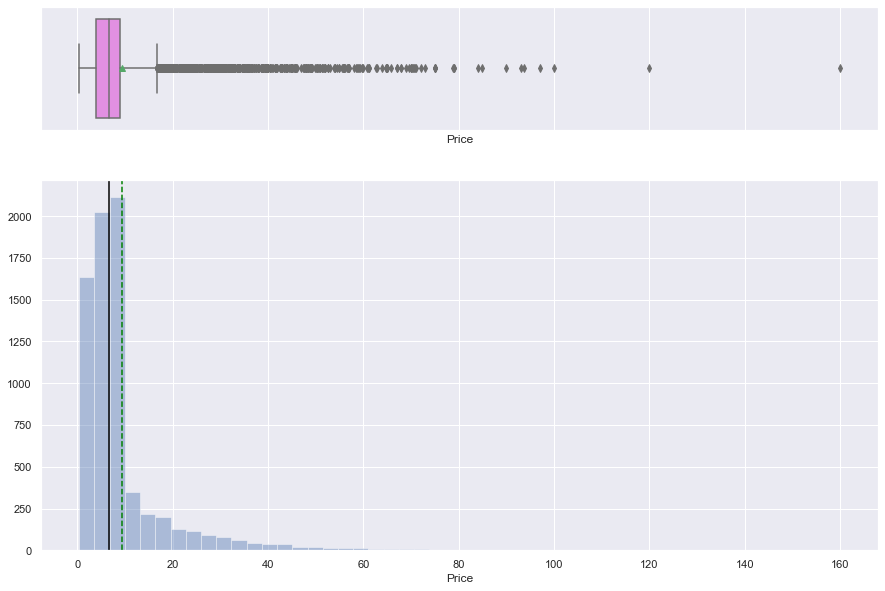

<IPython.core.display.Javascript object>

In [85]:
histogram_boxplot(df5["Price"])

* The **Price** are heavily right-skewed

### *Kilometers_Driven*

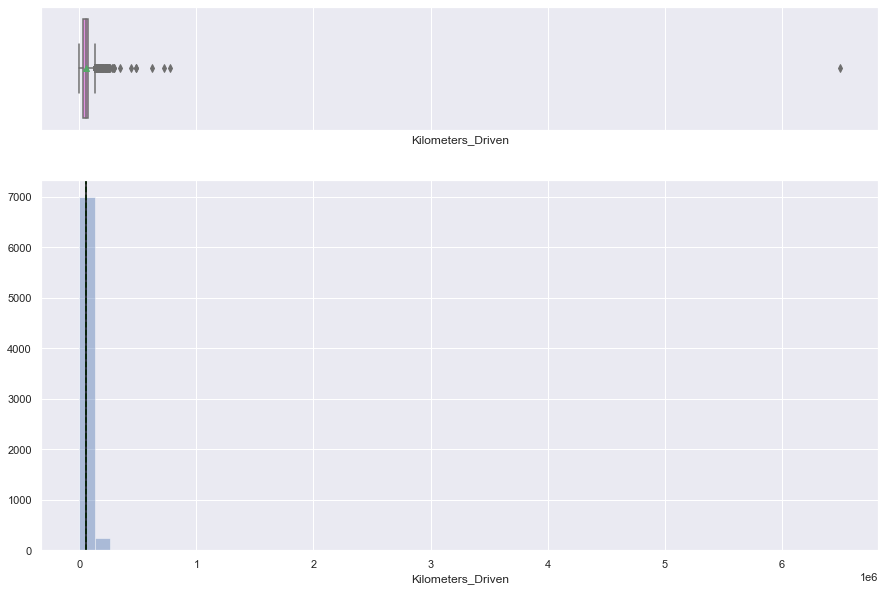

<IPython.core.display.Javascript object>

In [86]:
histogram_boxplot(df5["Kilometers_Driven"])

* The distribution is heavily right-skewed, as there are many **Kilometers_Driven** data in the dataset. (like 1455 unique value)

### *Mileage*

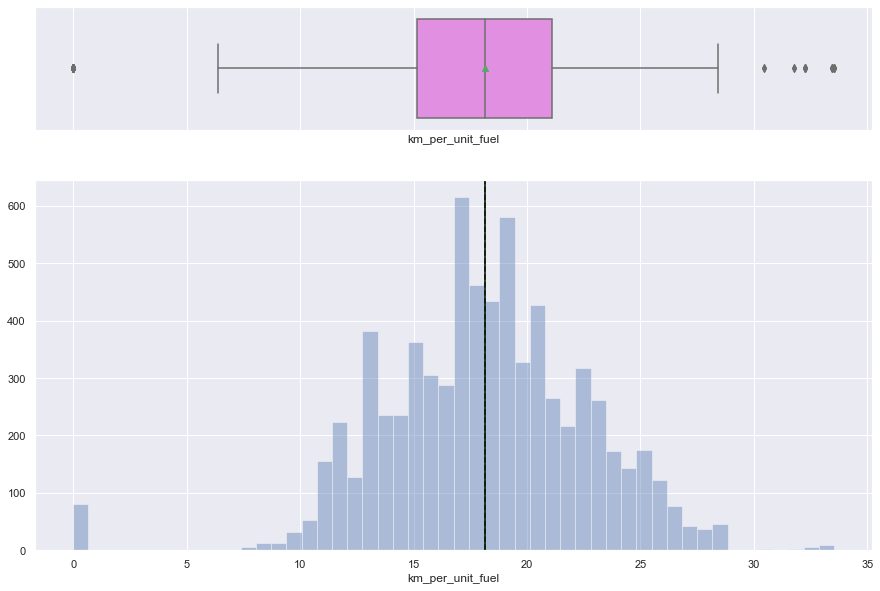

<IPython.core.display.Javascript object>

In [87]:
histogram_boxplot(df5["km_per_unit_fuel"])

* The distribution are normally distributed. and **Mileage** mean is around 18 kmpl

### *Engine*

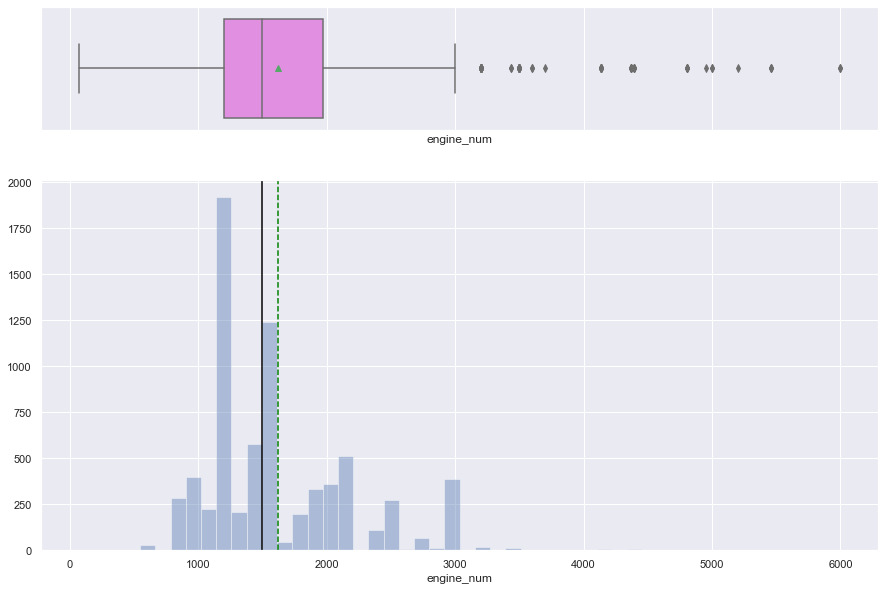

<IPython.core.display.Javascript object>

In [88]:
histogram_boxplot(df5["engine_num"])

* The distribution is close to normal. **Engine** size around 1500cc - 1700cc averagely

### *Power*

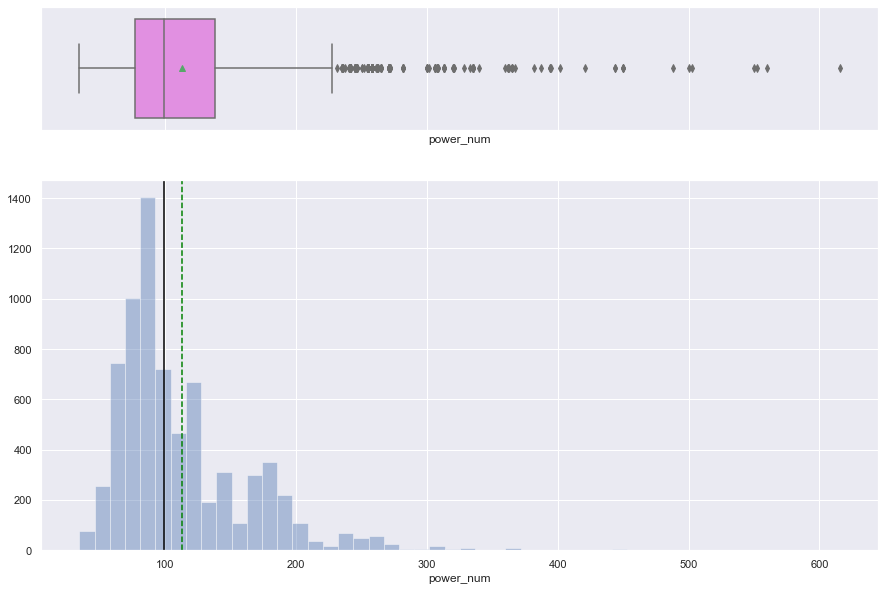

<IPython.core.display.Javascript object>

In [89]:
histogram_boxplot(df5["power_num"])

* The distribution is close to normal.Engine **Power** around 110 bph averagely.

### *New_Cars_Others*

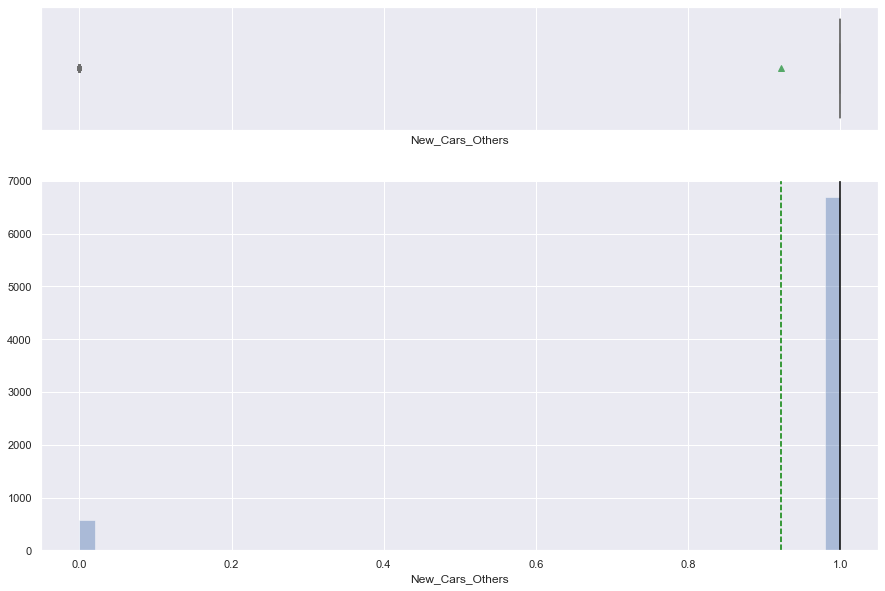

<IPython.core.display.Javascript object>

In [90]:
histogram_boxplot(df5["New_Cars_Others"])

* **New_Cars_Others** column represent less than 30 sold based on our threshold.
* The **New_Cars_Others** are heavily left-skewed, reason would be the 0-1 value only.

In [91]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### *Owner_Type*

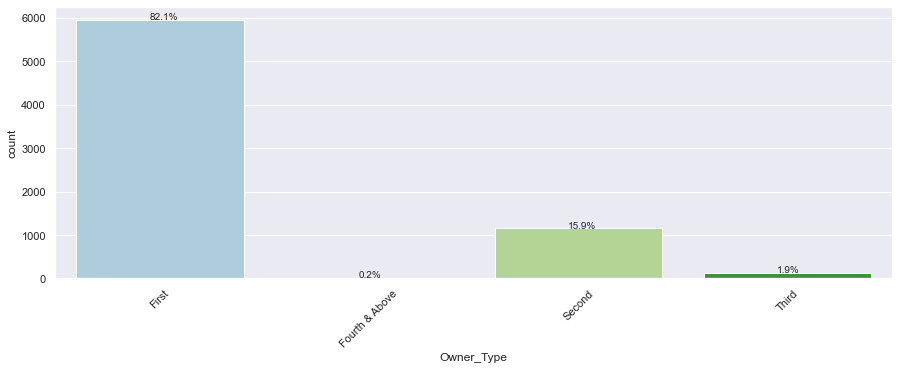

<IPython.core.display.Javascript object>

In [92]:
perc_on_bar(df, "Owner_Type")

* Majority of the **used cars** was sold as **First** hand. **First** hands used cars looks like top demand in the market.

### *Location*

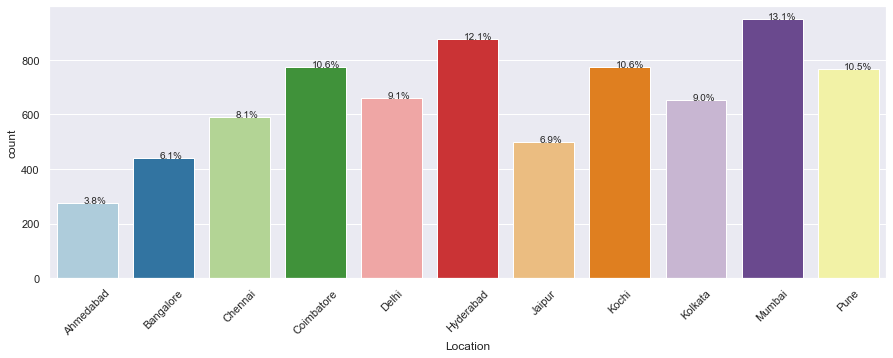

<IPython.core.display.Javascript object>

In [93]:
perc_on_bar(df, "Location")

* Looks like most of the car was sold in **Mumbai** and **Hyderabad**. They seems hot market for used car business

### *best_seller*

<AxesSubplot:xlabel='count', ylabel='best_seller'>

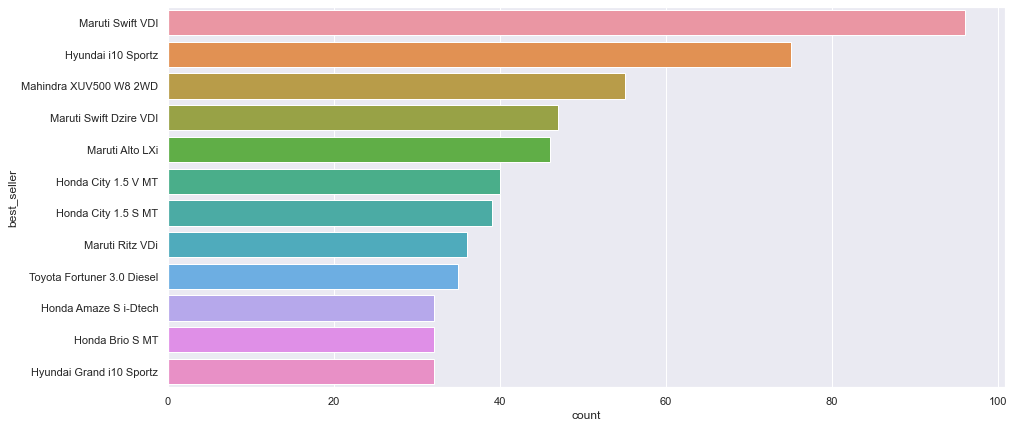

<IPython.core.display.Javascript object>

In [94]:
## replace others to numpy nan variable and drop it from dataframe to see top 4 sale car graph in data set

df_1 = df1.copy()

df_1["best_seller"] = df_1["best_seller"].replace("Others", np.nan)

df_1["best_seller"].dropna()


# perc_on_bar(df_1, "best_seller")
plt.figure(figsize=(15, 7))
sns.countplot(
    y="best_seller", data=df_1, order=df_1["best_seller"].value_counts().index
)

* we converted *Name* column into **best_seller** column sale amount more than **30**, so that was **top 12 car name** , rest of them was **Others**
* replaced **Others** to numpy **NaN** variable and drop all of them from dataframe because we convert majority of data in Name column to **Others** to see only **top 12 car name** for sale graph in data set
* **Maruti Swift VDI** Named car is top sale car among top 12 best selling car.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   S.No.              7253 non-null   int64   
 1   Name               7253 non-null   object  
 2   Location           7253 non-null   category
 3   Year               7253 non-null   int64   
 4   Kilometers_Driven  7253 non-null   int64   
 5   Fuel_Type          7253 non-null   category
 6   Transmission       7253 non-null   category
 7   Owner_Type         7253 non-null   category
 8   Seats              7253 non-null   float64 
 9   Price              7253 non-null   float64 
 10  km_per_unit_fuel   7253 non-null   float64 
 11  engine_num         7253 non-null   float64 
 12  power_num          7253 non-null   float64 
dtypes: category(4), float64(5), int64(3), object(1)
memory usage: 539.3+ KB


<IPython.core.display.Javascript object>

### *Transmission*

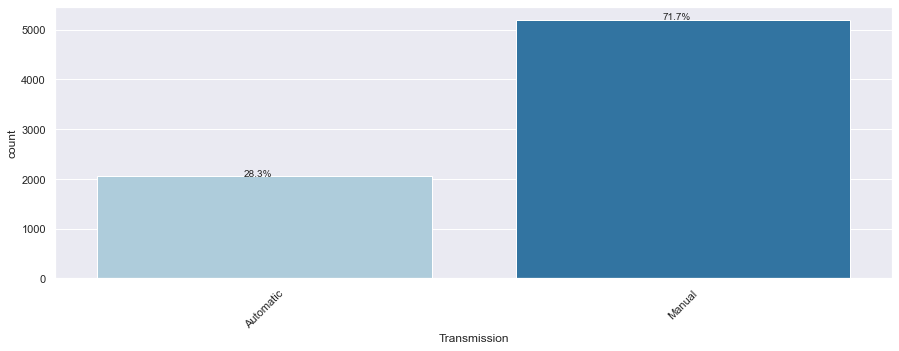

<IPython.core.display.Javascript object>

In [96]:
perc_on_bar(df, "Transmission")

* The **Transmission**  type of the sold car is mostly ,**71%** percent, **Manual** across all country.

### *Year*

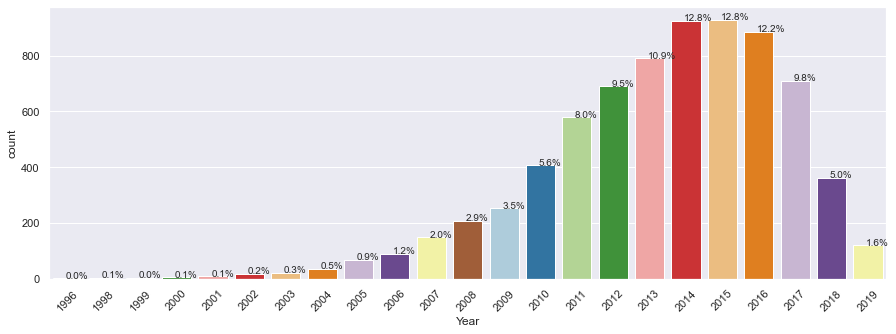

<IPython.core.display.Javascript object>

In [97]:
perc_on_bar(df, "Year")

* **2014** and **2015** model cars are top demand in the market

### *Seats*

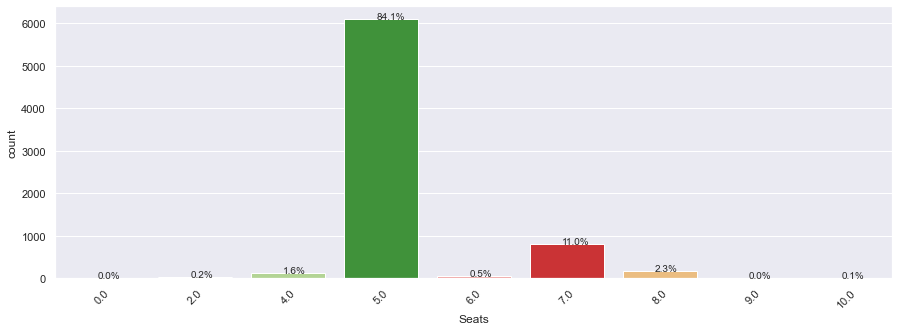

<IPython.core.display.Javascript object>

In [98]:
perc_on_bar(df5, "Seats")

* **5 seated** cars looks like top demand.

### Bivariate analysis

**We will not consider the *tag* columns for correlation check as they have only 0 or 1 values.**

In [99]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80


<IPython.core.display.Javascript object>

In [100]:
# creating a list of non-tag columns
corr_cols = [item for item in df.columns if "New" not in item]
print(corr_cols)

['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Price', 'km_per_unit_fuel', 'engine_num', 'power_num']


<IPython.core.display.Javascript object>

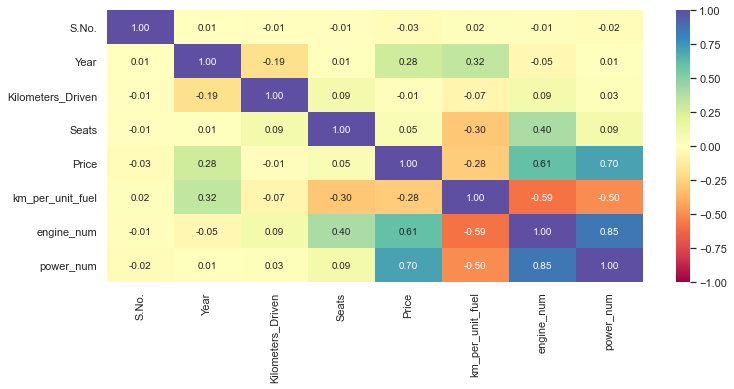

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(12, 5))
sns.heatmap(
    df[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [102]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,km_per_unit_fuel,engine_num,power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80


<IPython.core.display.Javascript object>

* **Power** and **Engine** columns are highly correlated.
* **Power** and **Price** columns are highly correlated.
* **Engine** and **Mileage** columns are negatively correlated.

### Let's check the variation in *rating* with some of the categorical columns in our data

### *Power* vs *Engine*

<AxesSubplot:xlabel='engine_num', ylabel='power_num'>

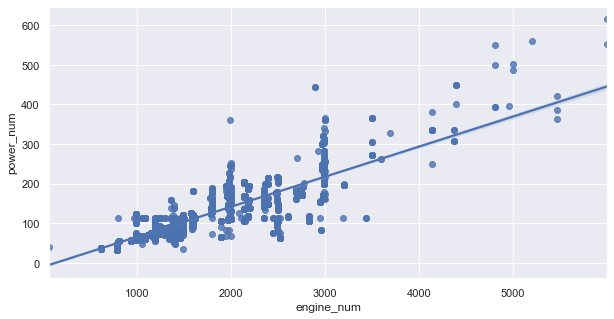

<IPython.core.display.Javascript object>

In [103]:
plt.figure(figsize=(10, 5))
sns.regplot(x="engine_num", y="power_num", data=df)

* **Engine** mostly in range (1000-3000) and when **Engine** size increase, **Power** is also increase as expected.

### *Power* vs *Price*

<AxesSubplot:xlabel='power_num', ylabel='Price'>

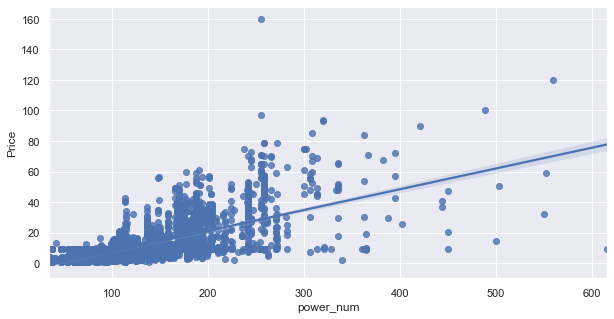

<IPython.core.display.Javascript object>

In [104]:
plt.figure(figsize=(10, 5))
sns.regplot(x="power_num", y="Price", data=df)

* **Power** mostly in range (100-300) and when **Power** increase, **Price** is also increase as expected.

### *Engine* vs *Price*

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

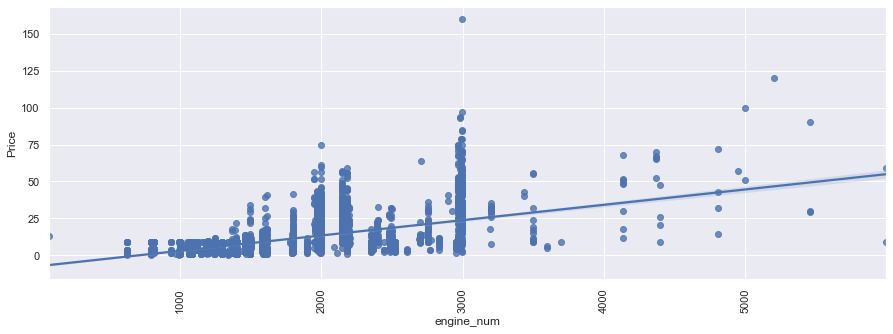

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(15, 5))
sns.regplot(x="engine_num", y="Price", data=df)
plt.xticks(rotation=90)

* when **Engine** size increase, **Price** is also increase as expected.

### *Engine* vs *Mileage*

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

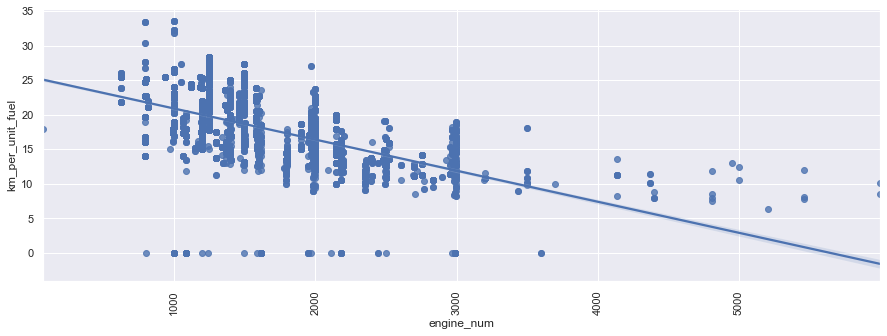

<IPython.core.display.Javascript object>

In [106]:
plt.figure(figsize=(15, 5))
sns.regplot(x="engine_num", y="km_per_unit_fuel", data=df)
plt.xticks(rotation=90)

* **Engine** and **Mileage** columns are negatively correlated as expected to see on the graph

In [107]:
## We can drop to S.No column has nothing to do, it just the order of numbers
df6.drop("S.No.", axis=1, inplace=True)

df6.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'km_per_unit_fuel',
       'engine_num', 'power_num', 'New_Cars_Others',
       'New_Cars_Maruti Swift VDI', 'New_Cars_Honda Amaze S i-Dtech',
       'New_Cars_Maruti Alto LXi', 'New_Cars_Hyundai Grand i10 Sportz',
       'New_Cars_Hyundai i10 Sportz', 'New_Cars_Maruti Ritz VDi',
       'New_Cars_Mahindra XUV500 W8 2WD',
       'New_Cars_Toyota Fortuner 3.0 Diesel', 'New_Cars_Honda Brio S MT',
       'New_Cars_Honda City 1.5 S MT', 'New_Cars_Honda City 1.5 V MT',
       'New_Cars_Maruti Swift Dzire VDI', 'New_Fuel_CNG', 'New_Fuel_Diesel',
       'New_Fuel_Petrol', 'New_Fuel_LPG', 'New_Fuel_Electric',
       'New_Tranmission_Manual', 'New_Tranmission_Automatic', 'New_First',
       'New_Second', 'New_Fourth & Above', 'New_Third', 'New_Location_Mumbai',
       'New_Location_Pune', 'New_Location_Chennai', 'New_Location_Coimbatore',
       'New_Location_Hyderabad', 'New_Location_Jaipur', 'New_Location_Kochi',
       'New_Location_Kolkat

<IPython.core.display.Javascript object>

## Variable Transformations

### checking the numeric columns other than the *New_* columns for skewness

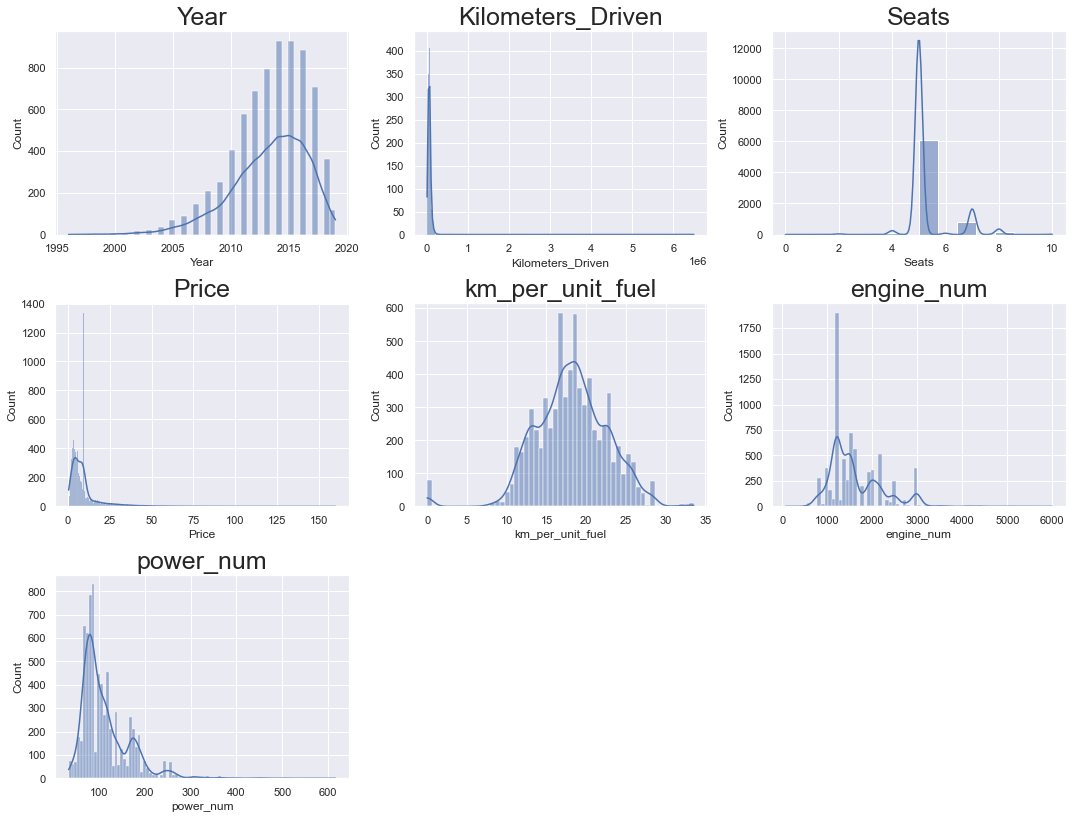

<IPython.core.display.Javascript object>

In [108]:
# creating a list of non-New_ columns
dist_cols = []

# creating a list of non-New_ columns
dist_cols = [
    item for item in df6.select_dtypes(include=np.number).columns if "New" not in item
]

# let's plot a histogram of all non-New_ columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    #     plt.hist(df6[dist_cols[i]], bins=50)
    sns.histplot(data=df6, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* We see that **Price**, **Kilometers_Driven**, **Year**, **Power** and **Engine** columns skewed distribution.
* We will apply the log transformation to all but not columns that we already converted **New_** tag columns which have 0-1 value above to deal with skewness in the data.
* **Mileage** column value looks very normal distribution.

In [109]:
# creating a copy of the dataframe
df7 = df6.copy()


# # also dropping the Mileage column as it is almost normally distributed
dist_cols.remove("km_per_unit_fuel")
# we can remove also "Seats" because look normal distrubiton
dist_cols.remove("Seats")
dist_cols

['Year', 'Kilometers_Driven', 'Price', 'engine_num', 'power_num']

<IPython.core.display.Javascript object>

In [110]:
# using log transforms on some columns

for col in dist_cols:
    df7[col + "_log"] = np.log(df7[col] + 1)

# dropping the original columns
df7.drop(dist_cols, axis=1, inplace=True)

df7.head()

,Seats,km_per_unit_fuel,New_Cars_Others,New_Cars_Maruti Swift VDI,New_Cars_Honda Amaze S i-Dtech,New_Cars_Maruti Alto LXi,New_Cars_Hyundai Grand i10 Sportz,New_Cars_Hyundai i10 Sportz,New_Cars_Maruti Ritz VDi,New_Cars_Mahindra XUV500 W8 2WD,New_Cars_Toyota Fortuner 3.0 Diesel,New_Cars_Honda Brio S MT,New_Cars_Honda City 1.5 S MT,New_Cars_Honda City 1.5 V MT,New_Cars_Maruti Swift Dzire VDI,New_Fuel_CNG,New_Fuel_Diesel,New_Fuel_Petrol,New_Fuel_LPG,New_Fuel_Electric,New_Tranmission_Manual,New_Tranmission_Automatic,New_First,New_Second,New_Fourth & Above,New_Third,New_Location_Mumbai,New_Location_Pune,New_Location_Chennai,New_Location_Coimbatore,New_Location_Hyderabad,New_Location_Jaipur,New_Location_Kochi,New_Location_Kolkata,New_Location_Delhi,New_Location_Bangalore,New_Location_Ahmedabad,Year_log,Kilometers_Driven_log,Price_log,engine_num_log,power_num_log
0,5.0,26.60,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7.606387,11.184435,1.011601,6.906755,4.080246
1,5.0,19.67,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7.608871,10.621352,2.602690,7.367077,4.845761
2,5.0,18.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7.606885,10.736418,1.704748,7.090077,4.496471
3,7.0,20.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7.607381,11.373675,1.945910,7.130099,4.497139
4,5.0,15.20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,7.607878,10.613271,2.930660,7.585281,4.954418


<IPython.core.display.Javascript object>

**checking for skewness after applying the log transformation.**

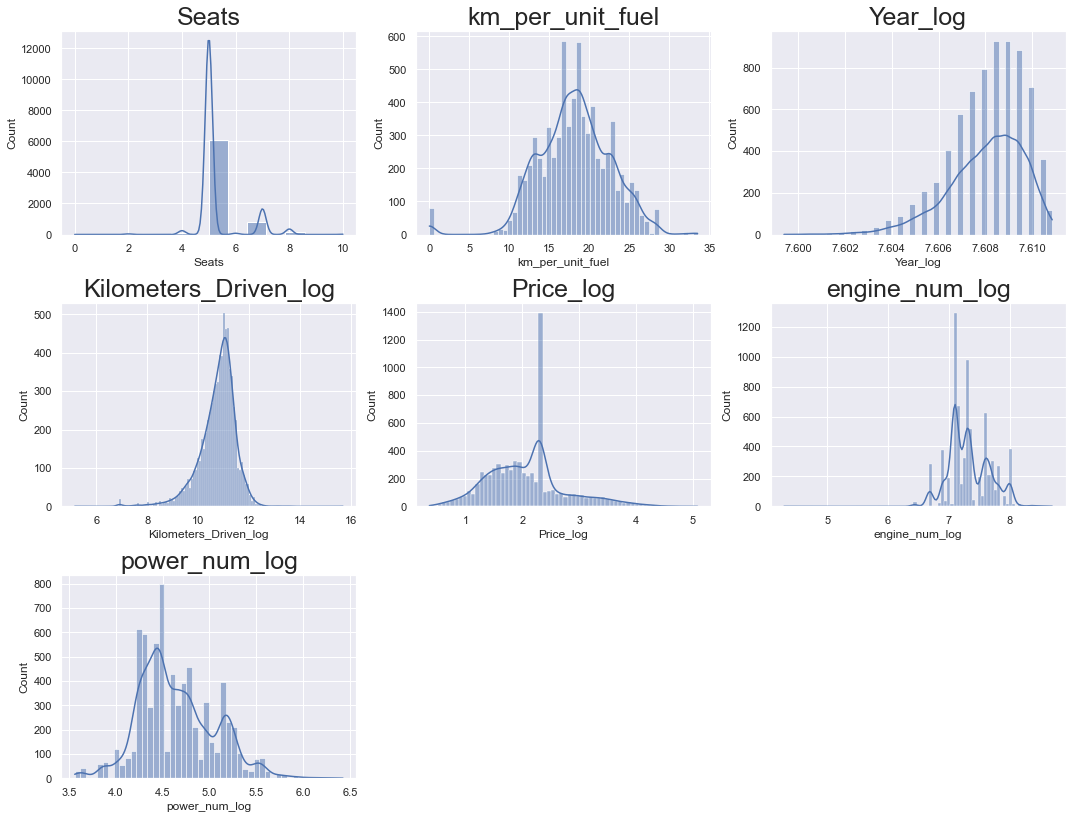

<IPython.core.display.Javascript object>

In [111]:
# creating a list of non-New_  columns
dist_cols = [
    item for item in df7.select_dtypes(include=np.number).columns if "New" not in item
]

# let's plot histogram of all non-New_ columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    #     plt.hist(df7[dist_cols[i]], bins=50)
    sns.histplot(data=df7, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns are still skewed, but not as heavily as before.

**Let's check for correlations between the columns (other than the tag columns)**

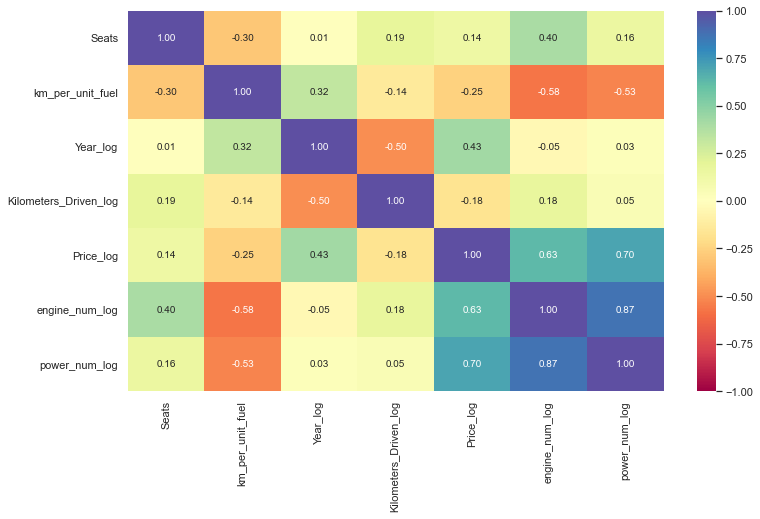

<IPython.core.display.Javascript object>

In [112]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df7[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are a few highly correlated columns.

In [113]:
df7.columns

Index(['Seats', 'km_per_unit_fuel', 'New_Cars_Others',
       'New_Cars_Maruti Swift VDI', 'New_Cars_Honda Amaze S i-Dtech',
       'New_Cars_Maruti Alto LXi', 'New_Cars_Hyundai Grand i10 Sportz',
       'New_Cars_Hyundai i10 Sportz', 'New_Cars_Maruti Ritz VDi',
       'New_Cars_Mahindra XUV500 W8 2WD',
       'New_Cars_Toyota Fortuner 3.0 Diesel', 'New_Cars_Honda Brio S MT',
       'New_Cars_Honda City 1.5 S MT', 'New_Cars_Honda City 1.5 V MT',
       'New_Cars_Maruti Swift Dzire VDI', 'New_Fuel_CNG', 'New_Fuel_Diesel',
       'New_Fuel_Petrol', 'New_Fuel_LPG', 'New_Fuel_Electric',
       'New_Tranmission_Manual', 'New_Tranmission_Automatic', 'New_First',
       'New_Second', 'New_Fourth & Above', 'New_Third', 'New_Location_Mumbai',
       'New_Location_Pune', 'New_Location_Chennai', 'New_Location_Coimbatore',
       'New_Location_Hyderabad', 'New_Location_Jaipur', 'New_Location_Kochi',
       'New_Location_Kolkata', 'New_Location_Delhi', 'New_Location_Bangalore',
       'New_Location

<IPython.core.display.Javascript object>

## Model Building

### Define dependent variable

In [114]:
ind_vars = df7.drop(["Price_log"], axis=1)
dep_var = df7[["Price_log"]]

<IPython.core.display.Javascript object>

In [115]:
ind_vars.shape

(7253, 41)

<IPython.core.display.Javascript object>

In [116]:
dep_var.shape

(7253, 1)

<IPython.core.display.Javascript object>

### Split the data into train and test

In [117]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [118]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 5077
Number of rows in test data = 2176


<IPython.core.display.Javascript object>

### Fitting a linear model

In [119]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [120]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Seats,-1.407891e-02
km_per_unit_fuel,-6.612302e-03
New_Cars_Others,5.698385e-04
New_Cars_Maruti Swift VDI,-4.804764e-03
New_Cars_Honda Amaze S i-Dtech,-2.387849e-01
New_Cars_Maruti Alto LXi,5.216020e-01
New_Cars_Hyundai Grand i10 Sportz,-5.786277e-02
New_Cars_Hyundai i10 Sportz,-2.738401e-02
New_Cars_Maruti Ritz VDi,-1.005681e-01
New_Cars_Mahindra XUV500 W8 2WD,-1.408747e-01


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficients of log of **Power**, log of **Engine**, log of **Year**, some of the **New_** tag columns like **New_Location_Hyderabad** , **New_First** hand,  **New_Tranmission_Automatic**, **New_Fuel_Diesel** etc. are positive.

    - Increase in these will lead to an increase in the Price of a car.


* Coefficients of log of **Kilometers_Driven**, some of the **New_** tag columns like **New_Location_Kochi**, **New_Third** hand, **New_Tranmission_Manual** , **New_Fuel_LPG** and so on are negative.

    - Increase in these will lead to a decrease in the Price of a car.

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate adjusted $R^2$.
* We will create a function that will print out all the above metrics in one go.

In [121]:
# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [122]:
# Checking model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))

# Checking model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

      RMSE       MAE       R^2  Adjusted R^2
0  0.36746  0.270862  0.709858      0.707495


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  0.373133  0.271124  0.721799      0.716454


<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.71 and 0.72, indicating that the model explains 71% and 72% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- $RMSE$ values 0.42 and 0.43 on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used car Price within a mean error of 0.31 on the test set.

- The overall performance looks good for prediction of car price with over 70% accuracy

## Conclusions

- We have been able to build a predictive model that can be used by Cars4U app or any car dealer work with the company to predict the Price of a car with an $R^2$ of 0.7151 on the training set.


- Cars4U can use this model to predict the car price within a mean error of 0.3131 on the test set.


- We found that the logarithm of the number of **Power**, **Engine** and **Year** and **Hyderabad** as location , **First** hand as owner_type,  **Automatic** as Tranmission, **Diesel** as Fuel type in dataset are some of the factors which tend to **increase** the price of a car.


- We found that **Kilometers_Driven** and some of the **New_** tag columns like **Kochi** as location, **Third** hand as owner_type, **Manual** as Tranmission , **LPG** as Fuel type in dataset are some of the factors which tend to **decrease** the price of a car.


- We improved our linear regression model performance by applying non-linear transformations to some of the attributes.


- We may also explore non-linear models, which might be able to better identify the patterns in the data to predict the car price with even higher accuracy.

## Forward Feature Selection 


In [123]:
# !pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    5.4s finished

[2021-07-17 13:29:25] Features: 1/41 -- score: 0.48058275262274386[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished

[2021-07-17 13:29:25] Features: 2/41 -- score: 0.6525484458506173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  39 | elapsed:    0.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.2s finished

[2021-07-17 13:29:25] Features: 3/41 -- score: 0.6654501535210474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished

[2021-07-17 13:29:25] Features: 4/41 -- score: 0.6815193970415113[Par

[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2021-07-17 13:29:36] Features: 30/41 -- score: 0.706138983148961[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2021-07-17 13:29:36] Features: 31/41 -- score: 0.7060948651676822[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished

[2021-07-17 13:29:37] Features: 32/41 -- score: 0.7060459991330239[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out

<IPython.core.display.Javascript object>

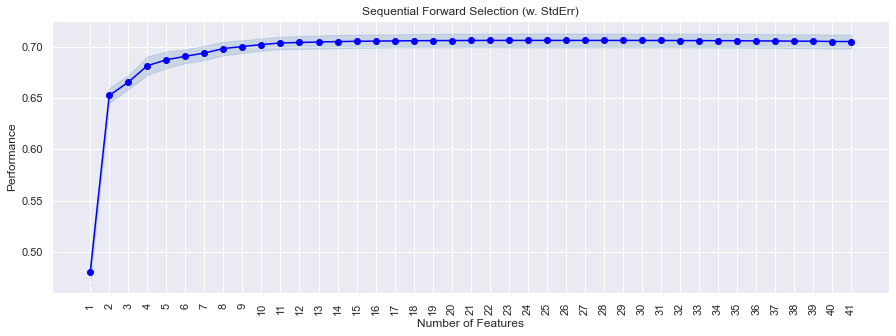

<IPython.core.display.Javascript object>

In [124]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.xticks(rotation=90)
plt.show()

* After 13th feature, model going onto the flat way, means features after 13th column is not much effective.

In [125]:
reg = LinearRegression()

# # Build step forward feature selection, we select 30 feature
sfs = SFS(
    reg,
    k_features=20,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  41 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    0.2s finished

[2021-07-17 13:29:40] Features: 1/20 -- score: 0.48058275262274386[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.3s finished

[2021-07-17 13:29:40] Features: 2/20 -- score: 0.6525484458506173[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    0.3s finished

[2021-07-17 13:29:40] Features: 3/20 -- score: 0.6654501535210474[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    0.2s finished

[2021-07-17 13:29:41] Features: 4/20 -- score: 0.6815193970415113[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent

<IPython.core.display.Javascript object>

In [126]:
# Let us select features which are important
feat_cols = list(sfs.k_feature_idx_)
print(feat_cols)

[1, 4, 5, 8, 9, 14, 16, 21, 22, 25, 26, 28, 29, 30, 33, 35, 37, 38, 39, 40]


<IPython.core.display.Javascript object>

In [127]:
x_train.columns[feat_cols]

Index(['km_per_unit_fuel', 'New_Cars_Honda Amaze S i-Dtech',
       'New_Cars_Maruti Alto LXi', 'New_Cars_Maruti Ritz VDi',
       'New_Cars_Mahindra XUV500 W8 2WD', 'New_Cars_Maruti Swift Dzire VDI',
       'New_Fuel_Diesel', 'New_Tranmission_Automatic', 'New_First',
       'New_Third', 'New_Location_Mumbai', 'New_Location_Chennai',
       'New_Location_Coimbatore', 'New_Location_Hyderabad',
       'New_Location_Kolkata', 'New_Location_Bangalore', 'Year_log',
       'Kilometers_Driven_log', 'engine_num_log', 'power_num_log'],
      dtype='object')

<IPython.core.display.Javascript object>

### Now we will fit an sklearn model using these features only

In [128]:
x_train_final = x_train[x_train.columns[feat_cols]]

<IPython.core.display.Javascript object>

In [129]:
# Creating new x_test with the same 20 variables that we selected for x_train
x_test_final = x_test[x_train_final.columns]

<IPython.core.display.Javascript object>

In [130]:
# Fitting linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train_final, y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model2.coef_.flatten(), lin_reg_model2.intercept_),
    index=x_train_final.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
print(coef_df)

                                 Coefficients
km_per_unit_fuel                    -0.005656
New_Cars_Honda Amaze S i-Dtech      -0.238092
New_Cars_Maruti Alto LXi             0.520844
New_Cars_Maruti Ritz VDi            -0.097442
New_Cars_Mahindra XUV500 W8 2WD     -0.156961
New_Cars_Maruti Swift Dzire VDI      0.153782
New_Fuel_Diesel                      0.171962
New_Tranmission_Automatic            0.226951
New_First                            0.039506
New_Third                           -0.103746
New_Location_Mumbai                 -0.023056
New_Location_Chennai                 0.035531
New_Location_Coimbatore              0.121811
New_Location_Hyderabad               0.095060
New_Location_Kolkata                -0.145652
New_Location_Bangalore               0.120721
Year_log                           148.638265
Kilometers_Driven_log               -0.086056
engine_num_log                       0.358053
power_num_log                        0.652693
Intercept                        -

<IPython.core.display.Javascript object>

In [131]:
# model performance on train set
print("Training Performance\n")
print(model_perf(lin_reg_model2, x_train_final, y_train))

# model performance on test set
print("\n\nTest Performance\n")
print(model_perf(lin_reg_model2, x_test_final, y_test))

Training Performance

      RMSE       MAE       R^2  Adjusted R^2
0  0.36796  0.271852  0.709067      0.707916


Test Performance

      RMSE       MAE       R^2  Adjusted R^2
0  0.37413  0.272518  0.720311      0.717715


<IPython.core.display.Javascript object>

**Observations**

* The new model uses half the number of features as the previous model.
* The performance of the new model, however, is almost same with previous model.
* Depending on different condition, we can choose either between 2 models.